In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pressure = pd.read_csv('Pressure Log Nov-21-2020-17-28-59.csv',header=None)
force = pd.read_table('Report.xls',header=None)

In [3]:
force_x = force[0].iloc[6:-1:]
force_y = force[1].iloc[6:-1:]
pressure_x=pressure[0]
pressure_y=pressure[1]
force_x=force_x.astype('float64')
force_y=force_y.astype('float64')

In [41]:
def dpsGenerator(dataArrayX,dataArrayY):
    till = int(dataArrayX.round().iloc[-1])
    xdata= []
    ydata= []
    tempMean = []
    for i in range(till+1):
        for(t,y) in zip(dataArrayX.round(),dataArrayY):
            if t == i:
                tempMean.append(y)
        xdata.append(i)
        ydata.append(np.around(np.mean(tempMean),2))
    return xdata,ydata
            

In [67]:
Px,Py = dpsGenerator(pressure_x,pressure_y)
Fx,Fy = dpsGenerator(force_x,force_y)
if len(Px) >= len(Fx):
    Px =Px[:len(Fx)]
    Py =Py[:len(Fx)]
else:
    Fx = Fx[:len(Px)]
    Fy = Fy[:len(Px)]

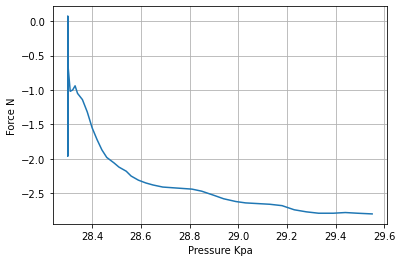

In [74]:
plt.plot(Py,Fy)
plt.xlabel('Pressure Kpa')
plt.ylabel('Force N')
plt.grid()
plt.show()